# Morphological Transformations
https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

In [42]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract

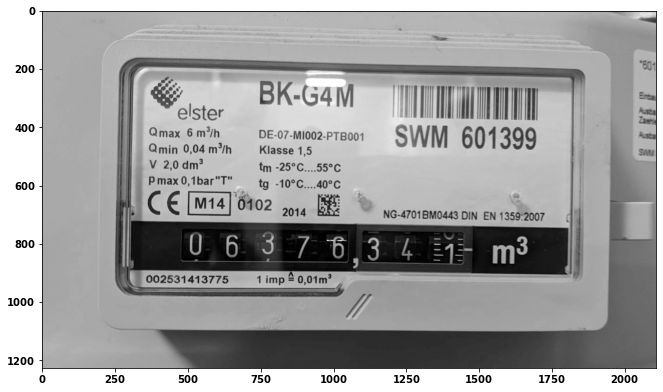

In [72]:
def bgr_2_gray(img):
    """ Converts a BGR image into a grayscale image based on blue and green, ignoring red 
    """
    return np.array(img[:,:,:2].mean(axis=2), dtype=np.uint8)

img_bgr = cv.imread('gas_sample.jpg', cv.IMREAD_COLOR)
img_raw = bgr_2_gray(img_bgr)

FIGSIZE = (11, 8)
plt.figure(figsize=FIGSIZE), plt.imshow(img_raw, plt.cm.gray);

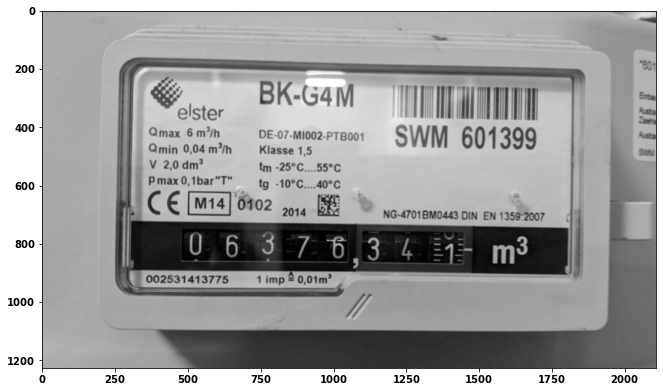

In [73]:
img_blur = cv.GaussianBlur(img_raw, (7, 7), 0)
plt.figure(figsize=FIGSIZE), plt.imshow(img_blur, plt.cm.gray);

--> __bluring__ doesn't help!

## Thresholding

1. Simple Threshold

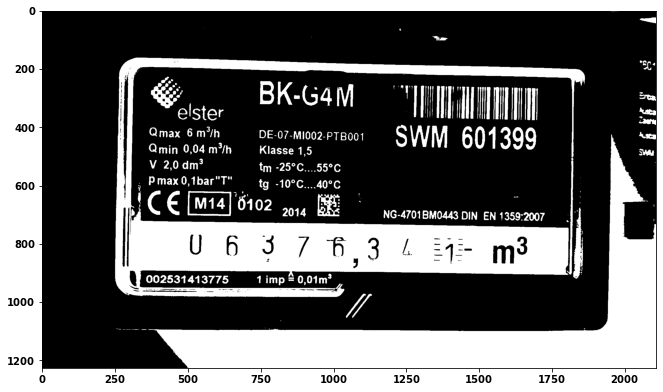

In [75]:
img_inv = cv.bitwise_not(img_raw)
_, img_bin = cv.threshold(img_inv, thresh=125, maxval=255, type=cv.THRESH_BINARY)
plt.figure(figsize=FIGSIZE), plt.imshow(img_bin, plt.cm.gray);

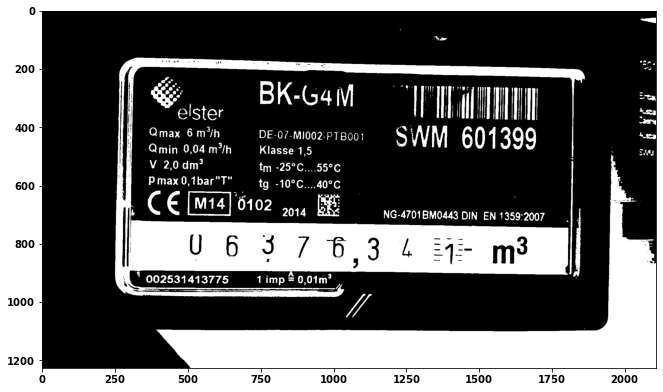

In [76]:
_, img_otsu = cv.threshold(img_inv, 0, 255, cv.THRESH_OTSU)
plt.figure(figsize=FIGSIZE), plt.imshow(img_otsu, plt.cm.gray);

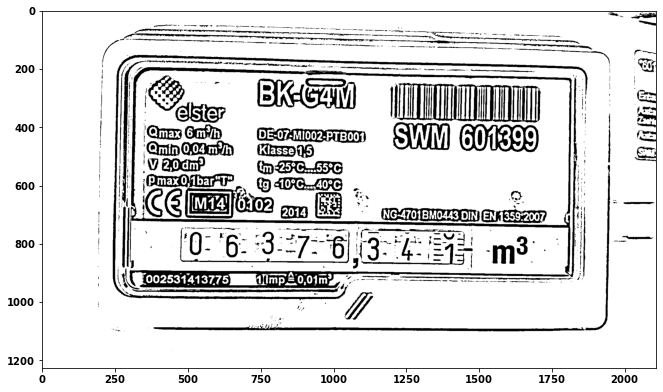

In [77]:
img_adp = cv.adaptiveThreshold(img_inv, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 21, 10)
plt.figure(figsize=FIGSIZE), plt.imshow(img_adp, plt.cm.gray);

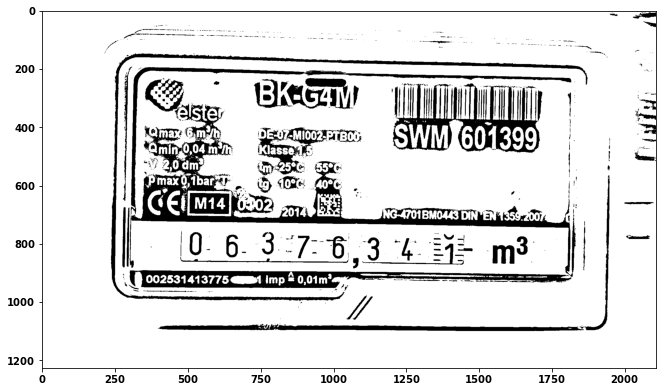

In [87]:
img_gau = cv.adaptiveThreshold(img_inv, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 101, 20)
plt.figure(figsize=FIGSIZE), plt.imshow(img_gau, plt.cm.gray);

## Now do the filtering

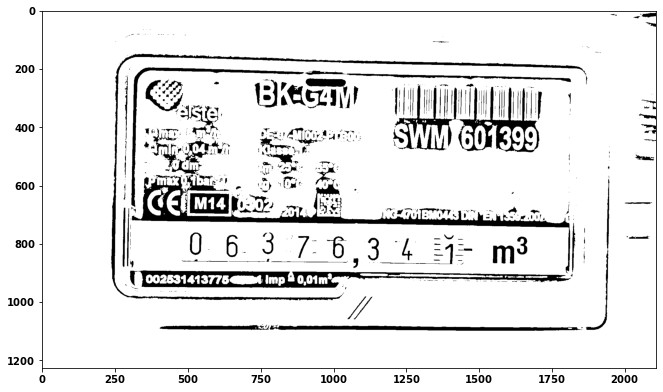

In [91]:
kernel = np.ones((3, 3),np.uint8)
img_del = cv.dilate(img_gau, kernel, iterations=1)
plt.figure(figsize=FIGSIZE), plt.imshow(img_del, plt.cm.gray);

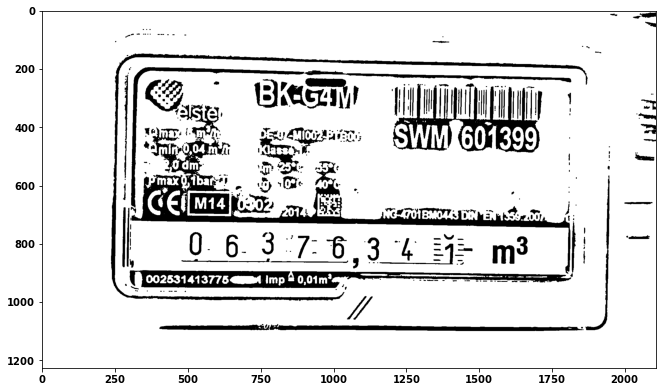

In [92]:
img_ero = cv.erode(img_del, kernel, iterations=1)
plt.figure(figsize=FIGSIZE), plt.imshow(img_ero, plt.cm.gray);

In [94]:
text = pytesseract.image_to_string(img_del)
print(text)

SC ——.


